영화 데이터 train과 test를 함께 label과 전처리 부터 다시해보자!

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

In [ ]:
train= pd.read_csv('movies_train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [ ]:
test = pd.read_csv('movies_test.csv')

In [ ]:
test['box_off_num'] = 0

train : 600개 \
test : 243개

In [ ]:
# train + test
df= pd.concat([train, test], axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           843 non-null    object 
 1   distributor     843 non-null    object 
 2   genre           843 non-null    object 
 3   release_time    843 non-null    object 
 4   time            843 non-null    int64  
 5   screening_rat   843 non-null    object 
 6   director        843 non-null    object 
 7   dir_prev_bfnum  377 non-null    float64
 8   dir_prev_num    843 non-null    int64  
 9   num_staff       843 non-null    int64  
 10  num_actor       843 non-null    int64  
 11  box_off_num     843 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 85.6+ KB


In [ ]:
# 결측치 처리
df.fillna(0, inplace=True)
df.isnull().sum()

title             0
distributor       0
genre             0
release_time      0
time              0
screening_rat     0
director          0
dir_prev_bfnum    0
dir_prev_num      0
num_staff         0
num_actor         0
box_off_num       0
dtype: int64

In [ ]:
# 필요없다고 생각한 변수 제거
df.drop(columns=["title", "time", "release_time", "director"], inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 843 entries, 0 to 242
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   distributor     843 non-null    object 
 1   genre           843 non-null    object 
 2   screening_rat   843 non-null    object 
 3   dir_prev_bfnum  843 non-null    float64
 4   dir_prev_num    843 non-null    int64  
 5   num_staff       843 non-null    int64  
 6   num_actor       843 non-null    int64  
 7   box_off_num     843 non-null    int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 59.3+ KB


In [ ]:
# label
df.distributor = df.distributor.astype('category')
df['distributtor_code'] = df.distributor.cat.codes

df.genre = df.genre.astype('category')
df['genre_code'] = df.genre.cat.codes

df.screening_rat = df.screening_rat.astype("category")
df['screening_rat_code'] = df.screening_rat.cat.codes

In [ ]:
# 
df['dir_prev_bfnum_log'] = np.log1p(df.dir_prev_bfnum)
df['num_staff_log'] = np.log1p(df.num_staff)
df['box_off_num_log'] = np.log1p(df.box_off_num)

In [ ]:
# 코드 column 생성
df =pd.get_dummies(df, columns=['genre_code'])
df= pd.get_dummies(df, columns=['distributtor_code'])
df= pd.get_dummies(df, columns=['screening_rat_code'])

In [ ]:
# 다시 DF 전처리
df = df.drop(columns=['distributor',
                      'genre',
                      'screening_rat',
                      'dir_prev_bfnum',
                      'num_staff']  )

In [ ]:
# 합쳤던 데이터 셋을 다시 나누기
dy = np.array(df.box_off_num_log)[:600]

x = df.drop(columns=['box_off_num_log', 'box_off_num'])
dx = np.array(x)[:600]
real_test_x = np.array(x)[600:]


In [ ]:
from sklearn.model_selection import train_test_split

train_x, test_x, train_y, test_y = train_test_split(dx, dy, test_size=0.2, random_state=42)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import optimizers
from tensorflow.keras.layers import Dense, Input

In [ ]:
# RMSE 
from tensorflow.keras.metrics import RootMeanSquaredError

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 10)                2250      
                                                                 
 dense_37 (Dense)            (None, 10)                110       
                                                                 
 dense_38 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,371
Trainable params: 2,371
Non-trainable params: 0
_________________________________________________________________


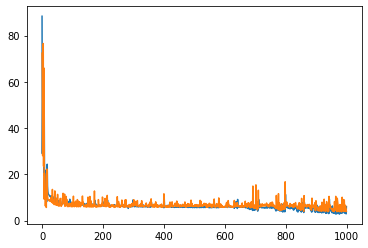

4/4 [==============================] - 0s 4ms/step - loss: 4.5903 - mape: 24.6927 - root_mean_squared_error: 2.1425
loss=  4.59030818939209
mape=  24.692710876464844
rmse=  2.142500400543213


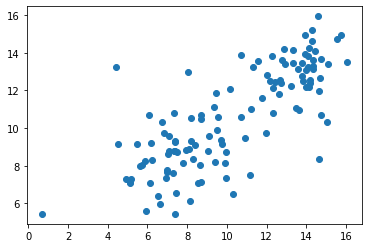

In [ ]:
model = keras.Sequential()
model.add(Dense(10, activation ='relu', input_shape=(x.shape[1],)))
model.add(Dense(10, activation ='relu'))
model.add(Dense(1))

model.compile(optimizer="SGD", loss="mse", metrics=["mape", RootMeanSquaredError()])
model.summary()

hist = model.fit(train_x, train_y, epochs=1000, verbose=0, batch_size=128, validation_split=0.1)

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

loss, mape, rmse = model.evaluate(test_x, test_y)
print("loss= ", loss)
print("mape= ", mape)
print("rmse= ", rmse)

y_ = model.predict(test_x)

plt.scatter(test_y, y_)
plt.show()

In [ ]:
loss, mape, rmse = model.evaluate(test_x, test_y)
print("loss= ", loss)
print("mape= ", mape)
print("rmse= ", rmse)

4/4 [==============================] - 0s 5ms/step - loss: 4.5903 - mape: 24.6927 - root_mean_squared_error: 2.1425
loss=  4.59030818939209
mape=  24.692710876464844
rmse=  2.142500400543213


In [ ]:
predicted = np.exp(y_)
org_test_y = np.exp(test_y)

rmse = RootMeanSquaredError()
r = rmse(predicted, org_test_y)
print(r)

tf.Tensor(1304492.2, shape=(), dtype=float32)


이렇게 했지만 거의 500등 \
1. 독립변수 설정을 다시 ?
2. 앙상블을 사용해보거나 ?
3. 데이터가 적으니 교차검증 도 해봐햐 하지 않을까?

라는 